In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nibss-nigerian-bank-fraud-datasets/nibss_fraud_dataset.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print("✅ Libraries loaded successfully")


✅ Libraries loaded successfully


In [5]:
df = pd.read_csv("/kaggle/input/nibss-nigerian-bank-fraud-datasets/nibss_fraud_dataset.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (1000000, 38)


,transaction_id,customer_id,timestamp,amount,channel,merchant_category,bank,location,age_group,hour,...,hour_cos,day_sin,day_cos,month_sin,month_cos,amount_log,amount_rounded,velocity_score,merchant_risk_score,composite_risk
0,TXN_F08A86FFD87C,CUST_0002AED1,2023-01-14 04:31:09,32266.83,Mobile,Grocery,Sterling,Other,30-39,4,...,0.500000,-0.974928,-0.222521,0.500000,0.866025,10.381826,0,0.189369,0.215000,0.070560
1,TXN_C2D08134EC83,CUST_0002AED1,2023-01-17 11:20:13,72530.49,Web,Entertainment,UBA,Other,30-39,11,...,-0.965926,0.781831,0.623490,0.500000,0.866025,11.191776,0,0.425671,0.877424,0.276849
2,TXN_B9499111901D,CUST_0002AED1,2023-01-22 02:17:46,168152.87,Mobile,Transport,Wema,Other,30-39,2,...,0.866025,-0.781831,0.623490,0.500000,0.866025,12.032635,0,0.986866,0.440230,0.163649
3,TXN_48DB1D526A3B,CUST_0002AED1,2023-01-24 08:18:23,16439.93,Mobile,Entertainment,FCMB,Other,30-39,8,...,-0.500000,0.781831,0.623490,0.500000,0.866025,9.707529,0,0.096484,0.877424,0.266315
4,TXN_56DB1E28B758,CUST_0002AED1,2023-02-01 15:39:53,9922.68,POS,Education,FirstBank,Other,30-39,15,...,-0.707107,0.974928,-0.222521,0.866025,0.500000,9.202679,0,0.058235,0.231291,0.071251


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 38 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   transaction_id        1000000 non-null  object 
 1   customer_id           1000000 non-null  object 
 2   timestamp             1000000 non-null  object 
 3   amount                1000000 non-null  float64
 4   channel               1000000 non-null  object 
 5   merchant_category     1000000 non-null  object 
 6   bank                  1000000 non-null  object 
 7   location              1000000 non-null  object 
 8   age_group             1000000 non-null  object 
 9   hour                  1000000 non-null  int64  
 10  day_of_week           1000000 non-null  int64  
 11  month                 1000000 non-null  int64  
 12  is_weekend            1000000 non-null  bool   
 13  is_peak_hour          1000000 non-null  bool   
 14  tx_count_24h          1000000 non-n

In [7]:
df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
amount,1000000.0,156951.422091,326358.997484,168.550000,28000.415000,66679.975000,159528.917500,1.792681e+07
hour,1000000.0,12.228639,4.798625,0.000000,9.000000,12.000000,15.000000,2.300000e+01
day_of_week,1000000.0,3.013070,1.997767,0.000000,1.000000,3.000000,5.000000,6.000000e+00
month,1000000.0,6.609283,3.464179,1.000000,3.000000,7.000000,10.000000,1.200000e+01
tx_count_24h,1000000.0,1.282159,0.533265,1.000000,1.000000,1.000000,1.000000,6.000000e+00
amount_sum_24h,1000000.0,199176.861599,374292.408400,168.550000,36172.097500,89718.615000,215098.970000,1.326406e+07
amount_mean_7d,1000000.0,155786.270334,218417.416637,212.830000,53274.168750,97793.752917,179514.494000,1.000000e+07
amount_std_7d,1000000.0,111295.108097,209167.124170,0.000000,14215.743554,51219.620895,124608.249289,4.998794e+06
tx_count_total,1000000.0,100.985146,9.900881,61.000000,94.000000,101.000000,107.000000,1.400000e+02
amount_mean_total,1000000.0,156224.102273,32450.494993,79531.073708,133244.011525,151366.221635,174289.988391,3.805088e+05


In [8]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

fraud_technique    997000
dtype: int64

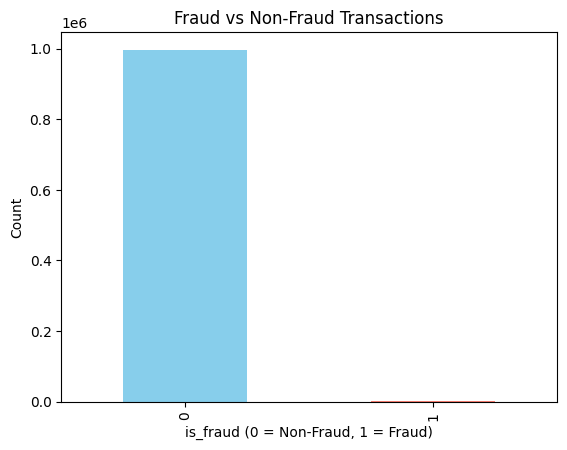

Fraud ratio (%):
is_fraud
0    99.7
1     0.3
Name: proportion, dtype: float64


In [9]:
df['is_fraud'].value_counts().plot(
    kind='bar', color=['skyblue', 'salmon'], 
    title='Fraud vs Non-Fraud Transactions'
)
plt.xlabel('is_fraud (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

print("Fraud ratio (%):")
print((df['is_fraud'].value_counts(normalize=True)*100).round(2))

In [10]:
print("Total unique banks:", df['bank'].nunique())
df['bank'].value_counts().head(10)

Total unique banks: 10


bank
Access       100413
Fidelity     100197
GTBank       100132
Union        100099
Sterling     100079
FirstBank     99939
Wema          99932
UBA           99839
FCMB          99725
Zenith        99645
Name: count, dtype: int64

In [11]:
cols_to_drop = ['transaction_id', 'customer_id', 'fraud_technique', 'timestamp']
df_clean = df.drop(columns=cols_to_drop)

print("Columns dropped:", cols_to_drop)
print("New shape of dataset:", df_clean.shape)

Columns dropped: ['transaction_id', 'customer_id', 'fraud_technique', 'timestamp']
New shape of dataset: (1000000, 34)


In [12]:
from sklearn.preprocessing import LabelEncoder
df_clean = pd.get_dummies(df_clean, columns=['bank', 'channel', 'merchant_category', 'age_group'], drop_first=True)

le = LabelEncoder()
df_clean['location'] = le.fit_transform(df_clean['location'])

print("Categorical columns encoded ✅")
print("Shape after encoding:", df_clean.shape)

Categorical columns encoded ✅
Shape after encoding: (1000000, 60)


In [13]:
from sklearn.preprocessing import StandardScaler
num_cols = df_clean.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('is_fraud')

scaler = StandardScaler()
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

print("Numeric columns scaled ✅")

Numeric columns scaled ✅


In [14]:
X = df_clean.drop('is_fraud', axis=1)
y = df_clean['is_fraud']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1000000, 59)
Target shape: (1000000,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (800000, 59) (800000,)
Test shape: (200000, 59) (200000,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize model with balanced class weight
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[199400      0]
 [   293    307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199400
           1       1.00      0.51      0.68       600

    accuracy                           1.00    200000
   macro avg       1.00      0.76      0.84    200000
weighted avg       1.00      1.00      1.00    200000



In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import xgboost as xgb

# model training and evaluation

# Clean column names for XGBoost
X_train_clean = X_train.copy()
X_test_clean = X_test.copy()

X_train_clean.columns = X_train_clean.columns.str.replace('[\[\]<>]', '', regex=True)
X_test_clean.columns = X_test_clean.columns.str.replace('[\[\]<>]', '', regex=True)

print("Column names cleaned for XGBoost ✅")

#Logistic Regression
print("=== Logistic Regression ===")
lr = LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

#adjust thresold to improve recall
threshold = 0.3
y_pred_lr_thresh = (y_prob_lr > threshold).astype(int)
print(f"\nConfusion Matrix with threshold {threshold}:")
print(confusion_matrix(y_test, y_pred_lr_thresh))
print("\nClassification Report with threshold adjustment:")
print(classification_report(y_test, y_pred_lr_thresh))

#random forest
print("\n=== Random Forest ===")
rf = RandomForestClassifier(
    n_estimators=50,  # fewer trees for speed
    max_depth=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

#XGBoost
print("\n=== XGBoost ===")
xgb_clf = xgb.XGBClassifier(
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),  # handle imbalance
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_clf.fit(X_train_clean, y_train)
y_pred_xgb = xgb_clf.predict(X_test_clean)
y_prob_xgb = xgb_clf.predict_proba(X_test_clean)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

Column names cleaned for XGBoost ✅
=== Logistic Regression ===
Confusion Matrix:
[[140246  59154]
 [   177    423]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.83    199400
           1       0.01      0.70      0.01       600

    accuracy                           0.70    200000
   macro avg       0.50      0.70      0.42    200000
weighted avg       1.00      0.70      0.82    200000

ROC-AUC Score: 0.7988227515880977

Confusion Matrix with threshold 0.3:
[[ 85498 113902]
 [    54    546]]

Classification Report with threshold adjustment:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60    199400
           1       0.00      0.91      0.01       600

    accuracy                           0.43    200000
   macro avg       0.50      0.67      0.30    200000
weighted avg       1.00      0.43      0.60    200000


=== Random Forest ===
Confusion Matrix:
[[198529

In [18]:
print(clf.n_features_in_)


59


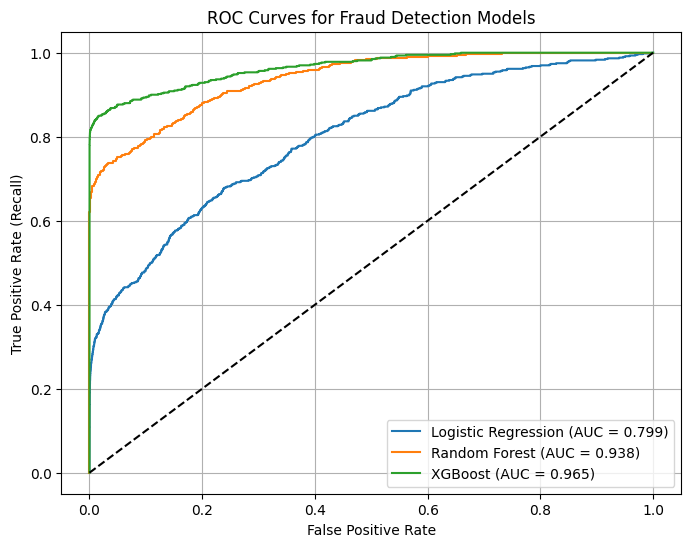

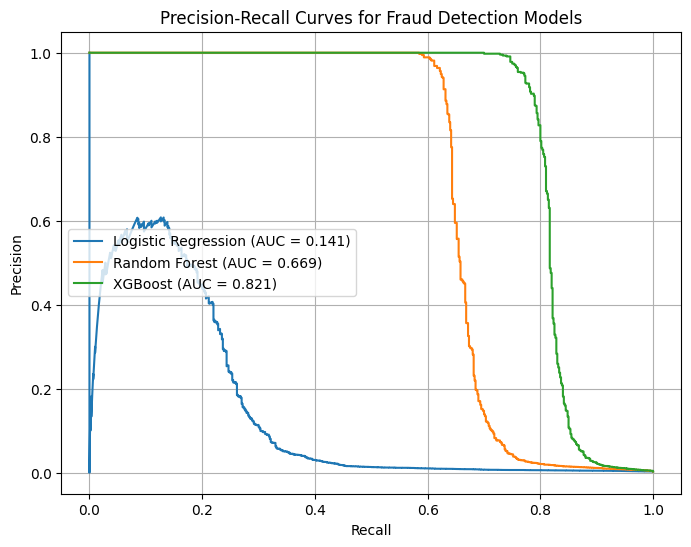

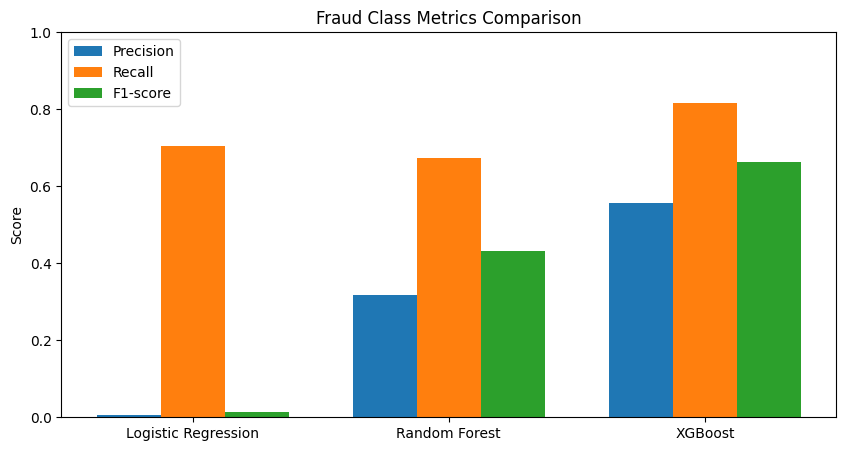

In [19]:
#Visualization & Insights

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Clean XGBoost column names again just in case
X_test_clean = X_test.copy()
X_test_clean.columns = X_test_clean.columns.str.replace('[\[\]<>]', '', regex=True)

# Models and their probabilities
models = {
    "Logistic Regression": (y_prob_lr, y_pred_lr),
    "Random Forest": (y_prob_rf, y_pred_rf),
    "XGBoost": (y_prob_xgb, y_pred_xgb)
}

# ROC Curves

plt.figure(figsize=(8,6))
for name, (y_prob, _) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves for Fraud Detection Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(8,6))
for name, (y_prob, _) in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {pr_auc:.3f})')

plt.title("Precision-Recall Curves for Fraud Detection Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

# Bar chart for F1-score, Precision, Recall for fraud class
import numpy as np

metrics = []
for name, (_, y_pred) in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics.append([
        name,
        report['1']['precision'],
        report['1']['recall'],
        report['1']['f1-score']
    ])

metrics = np.array(metrics)
names = metrics[:,0]
precision = metrics[:,1].astype(float)
recall = metrics[:,2].astype(float)
f1 = metrics[:,3].astype(float)

x = np.arange(len(names))
width = 0.25

plt.figure(figsize=(10,5))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-score')
plt.xticks(x, names)
plt.ylabel("Score")
plt.title("Fraud Class Metrics Comparison")
plt.ylim(0,1)
plt.legend()
plt.show()

In [20]:
import joblib
import json

# Save the trained XGBoost model
joblib.dump(xgb_clf, "fraud_detection_xgb.pkl")
print("✅ Model saved as fraud_detection_xgb.pkl")

# Save the LabelEncoder for 'location'
joblib.dump(le, "label_encoder_location.pkl")
print("✅ LabelEncoder saved as label_encoder_location.pkl")

# Save the StandardScaler
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved as scaler.pkl")

# Save the feature list (order is important)
features = list(X_train.columns)
with open("feature_list.json", "w") as f:
    json.dump(features, f)
print("✅ Feature list saved as feature_list.json")

✅ Model saved as fraud_detection_xgb.pkl
✅ LabelEncoder saved as label_encoder_location.pkl
✅ Scaler saved as scaler.pkl
✅ Feature list saved as feature_list.json


In [21]:
import joblib
import json
import pandas as pd
import numpy as np

# Load the trained XGBoost model
xgb_clf = joblib.load("fraud_detection_xgb.pkl")
print("✅ Model loaded")

# Load the LabelEncoder for 'location'
le = joblib.load("label_encoder_location.pkl")
print("✅ LabelEncoder loaded")

# Load the StandardScaler
scaler = joblib.load("scaler.pkl")
print("✅ Scaler loaded")

# Load the feature list
with open("feature_list.json", "r") as f:
    feature_list = json.load(f)
print("✅ Feature list loaded")

# Quick check
print("Number of features:", len(feature_list))
print("First 5 features:", feature_list[:5])

✅ Model loaded
✅ LabelEncoder loaded
✅ Scaler loaded
✅ Feature list loaded
Number of features: 59
First 5 features: ['amount', 'location', 'hour', 'day_of_week', 'month']


In [22]:
def predict_fraud(amount, location, hour, day_of_week, month,
                  bank, channel, merchant_category, age_group):
    
    # Create a DataFrame with one row for user input
    input_dict = {
        'amount': [amount],
        'location': [location],
        'hour': [hour],
        'day_of_week': [day_of_week],
        'month': [month],
        'bank_' + bank: [1],
        'channel_' + channel: [1],
        'merchant_category_' + merchant_category: [1],
        'age_group_' + age_group: [1],
    }
    
    # Convert to DataFrame
    df_input = pd.DataFrame(input_dict)
    
    # Add missing columns as 0
    for feat in feature_list:
        if feat not in df_input.columns:
            df_input[feat] = 0
    # Reorder columns to match training
    df_input = df_input[feature_list]
    
    # Encode 'location' using LabelEncoder
    df_input['location'] = le.transform(df_input['location'])
    
    # Scale numeric columns
    numeric_cols = ['amount', 'hour', 'day_of_week', 'month']
    df_input[numeric_cols] = scaler.transform(df_input[numeric_cols])
    
    # Make prediction
    pred_prob = xgb_clf.predict_proba(df_input)[:,1][0]
    
    return f"Fraud Probability: {pred_prob:.2f}"

In [23]:
import gradio as gr

# Define the input components
inputs = [
    gr.Number(label="Amount"),
    gr.Dropdown(choices=list(le.classes_), label="Location"),
    gr.Number(label="Hour (0-23)"),
    gr.Number(label="Day of Week (0=Monday,6=Sunday)"),
    gr.Number(label="Month (1-12)"),
    gr.Dropdown(choices=['bank_ABC', 'bank_XYZ', 'bank_DEF'], label="Bank"),  # example banks
    gr.Dropdown(choices=['Online', 'POS', 'ATM'], label="Channel"),            # example channels
    gr.Dropdown(choices=['Food', 'Retail', 'Travel'], label="Merchant Category"), # example categories
    gr.Dropdown(choices=['18-25','26-35','36-50','50+'], label="Age Group")     # example age groups
]

# Create Gradio Interface
gr_interface = gr.Interface(
    fn=predict_fraud,
    inputs=inputs,
    outputs=gr.Textbox(label="Prediction"),
    title="Banking Fraud Detection 💳",
    description="Enter transaction details to predict fraud probability."
)

# Launch the interface
gr_interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Missing file: /root/.cache/huggingface/gradio/frpc/frpc_linux_amd64_v0.3. 

Please check your internet connection. This can happen if your antivirus software blocks the download of this file. You can install manually by following these steps: 

1. Download this file: https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_linux_amd64
2. Rename the downloaded file to: frpc_linux_amd64_v0.3
3. Move the file to this location: /root/.cache/huggingface/gradio/frpc


In [24]:
import os
print("Current Working Directory Contents:")
print(os.listdir('.'))

Current Working Directory Contents:
['scaler.pkl', 'label_encoder_location.pkl', 'feature_list.json', 'fraud_detection_xgb.pkl', '.virtual_documents']


In [25]:
import joblib
joblib.dump(clf, "model.pkl")


['model.pkl']

In [26]:
import sklearn
print(sklearn.__version__)

1.2.2


In [27]:
import os
import joblib
import json

# Save files explicitly to /kaggle/working
joblib.dump(clf, "/kaggle/working/model.pkl")
joblib.dump(scaler, "/kaggle/working/scaler.pkl")

features = list(X_train.columns)
with open("/kaggle/working/feature_list.json", "w") as f:
    json.dump(features, f)

print("Files saved in /kaggle/working:")
print(os.listdir("/kaggle/working"))


Files saved in /kaggle/working:
['scaler.pkl', 'model.pkl', 'label_encoder_location.pkl', 'feature_list.json', 'fraud_detection_xgb.pkl', '.virtual_documents']


In [28]:
# Export XGBoost model in deployment-safe format
xgb_clf.get_booster().save_model("fraud_detection_xgb.json")

print("✅ XGBoost model saved as fraud_detection_xgb.json")


✅ XGBoost model saved as fraud_detection_xgb.json
